In [10]:
#matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect



In [14]:
# create engine to hawaii.sqlite
hawaii_database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{hawaii_database_path}")
conn = engine.connect()

In [15]:
# Automap base
Base = automap_base()
Base.prepare(engine, reflect=True)

In [22]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table

# Save references to each table in hawaii.sqlite
MS = Base.classes.measurement
ST = Base.classes.station

In [18]:
# Create our session/link from Python to the DB
session = Session(engine)

# View database
session.query(MS, ST).all()

[(<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af6a0>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af700>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af790>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af820>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af8b0>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af940>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291af9d0>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0x7fda291afa60>),
 (<sqlalchemy.ext.automap.measurement at 0x7fda291af610>,
  <sqlalchemy.ext.automap.station at 0

In [ ]:
#
# Exploratory Precipitation Analysis
#

In [19]:
# Find the most recent date in the data set.
# descending order
session.query(MS.date).order_by(MS.date.desc()).first()

('2017-08-23')

In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_date = dt.date(2017,8,23)- dt.timedelta(days=365)
print("date :", year_date)

# Perform a query to retrieve the data and precipitation scores
annual_rain = session.query(MS.date, MS.prcp).filter(MS.date >= year_date).all()
annual_rain

# Save the query results as a Pandas DataFrame and set the index to the date column
rain = pd.DataFrame(annual_rain, columns=['Date', 'Prcp'])
rain.set_index('Date', inplace=True)

# Sort the dataframe by date
rain.sort_index()


date : 2016-08-23


,Prcp
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


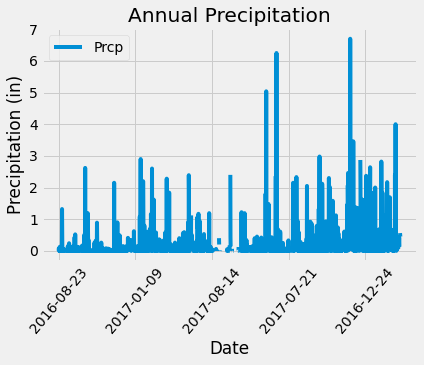

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
rain.plot(rot = 50, title='Annual Precipitation')
plt.ylabel('Precipitation (in)')
plt.tight_layout
plt.savefig("Images/Annual_Precipitation.png")
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#
#  Exploratory Station Analysis
#

In [23]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(ST.station).group_by(ST.id).count()
print(f"The total number stations in the dataset is: {station_count}")

The total number stations in the dataset is: 9


In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active =session.query(MS.station).group_by(MS.station).\
    order_by(func.count(MS.date).desc()).first()
most_active= active[0]
most_active

'USC00519281'

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
print(f"The station id of the most active station is {most_active}.")

The station id of the most active station is USC00519281.


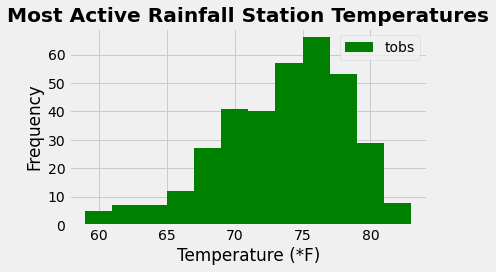

<Figure size 432x288 with 0 Axes>

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_temperature = session.query(MS.tobs).filter(MS.station == most_active).\
    filter(MS.date>=year_date).all()
#temp_active.head() 

#Make a dataframe bc temp_active is a tuple ('list' object)
temp_df = pd.DataFrame(active_temperature, columns=["tobs"])
#temp_df.head()

#temp_active
plt.hist(temp_df["tobs"], color ='green', bins=12)
plt.ylabel("Frequency")
plt.xlabel('Temperature (*F)')
plt.title('Most Active Rainfall Station Temperatures',
          fontweight ="bold")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

# Save the plot
plt.savefig("Images/Most_Active_Histogram.png")

In [ ]:
#
# Close Session
session.close()